In [20]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
# data
data_filepath = '../datasets/Obfuscated/Obfuscated-MalMem2022_edited.csv'
data= pd.read_csv(data_filepath)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [23]:
# Preprocess data
X_drop_columns = ['Class', 
                'Category', 
                'svcscan.interactive_process_services', 
                'handles.nport', 
                'modules.nmodules',
                'pslist.nprocs64bit', 
                'callbacks.ngeneric']
X = data.drop(columns=X_drop_columns)
y = data.Class

In [24]:
total_classes = y.nunique()
print("Total classes: %s"%total_classes)

Total classes: 2


In [25]:
distribution = y.value_counts() 
print(distribution)

Class
Benign     29298
Malware    29298
Name: count, dtype: int64


In [26]:
# Encode string categories to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(X)
print(y)

       pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
0                45            17           10.555556           202.844444   
1                47            19           11.531915           242.234043   
2                40            14           14.725000           288.225000   
3                32            13           13.500000           264.281250   
4                42            16           11.452381           281.333333   
...             ...           ...                 ...                  ...   
58591            37            15           10.108108           215.486487   
58592            37            14            9.945946           190.216216   
58593            38            15            9.842105           210.026316   
58594            37            15           10.243243           215.513513   
58595            38            15            9.868421           213.026316   

       dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandl

In [27]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Creating adaboost classifier model 
adb = AdaBoostClassifier(n_estimators=data.shape[1], learning_rate=1, random_state=42) 
adb_model = adb.fit(X_train, y_train)
y_pred = adb_model.predict(X_test)
print('Training accuracy:', adb.score(X_train, y_train))
print('Test accuracy:', adb.score(X_test, y_test))

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training accuracy: 1.0
Test accuracy: 0.9999431139427726


In [29]:
y_pred = adb.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Precision score: {precision_score(y_test, y_pred, average='weighted', zero_division=0)}")
print(f"Recall score: {recall_score(y_test, y_pred, average='weighted', zero_division=0)}")
print(f"F-1 score: {f1_score(y_test, y_pred, average='weighted', zero_division=0)}")

Accuracy score: 0.9999431139427726
Precision score: 0.9999431203851348
Recall score: 0.9999431139427726
F-1 score: 0.9999431139280456


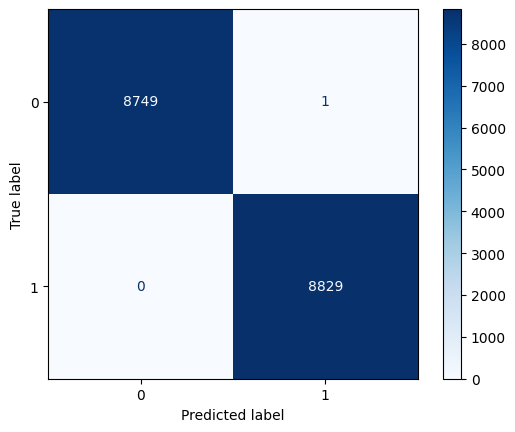

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test are the true labels and predictions are the model predictions
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


**AdaBoost**

AdaBoost (Adaptive Boosting) is a machine learning algorithm that is used for classification tasks. It is an ensemble method that combines multiple weak classifiers to create a strong classifier. 

The AdaBoostClassifier variable in this Jupyter Notebook is of type `sklearn.ensemble._weight_boosting.AdaBoostClassifier`. It has been imported from the `sklearn.ensemble` module.

The `adb` and `adb_model` variables are instances of the AdaBoostClassifier. They have been created with the parameters `learning_rate=1` and `random_state=0`.

The AdaBoostClassifier is trained on the `X_train` and `y_train` data, and used to make predictions on the `X_test` data. The predicted labels are stored in the `y_pred` variable.

To evaluate the performance of the AdaBoostClassifier, the `accuracy_score` function from the `sklearn.metrics` module can be used. It compares the predicted labels (`y_pred`) with the true labels (`y_test`) and returns the accuracy of the classifier.

Overall, AdaBoost is a powerful algorithm for classification tasks, especially when combined with weak classifiers. It can be used to improve the accuracy of predictions and handle complex datasets.